In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Task 1

In [76]:
G = nx.karate_club_graph()

In [77]:
def plotResults(G, alpha, iterations):
    page_rank = nx.pagerank(G, alpha, max_iter=iterations)
    plt.title("Page rank with alpha=%.2f, max_iter=%d" % (alpha, iterations))
    plt.plot(page_rank.keys(), page_rank.values(), '.')
    plt.show()

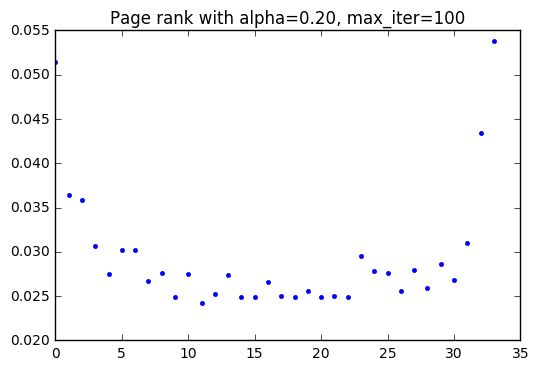

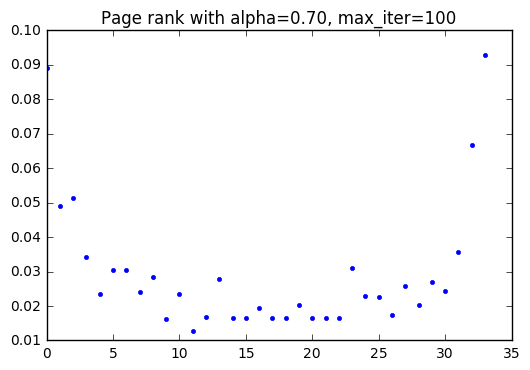

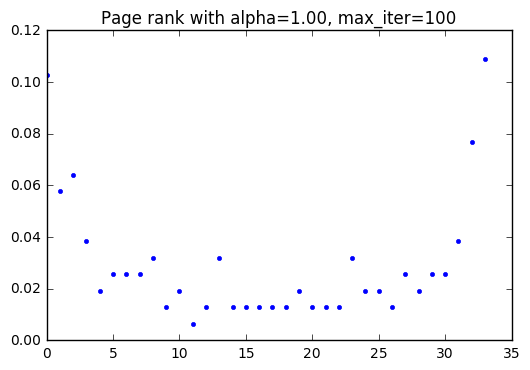

In [78]:
it = 100
for alpha in [0.2, 0.7, 1]:
    plotResults(G, alpha, it)

Distribution doesn't change much with change of $\alpha$, the only thing that changes is ranking values.

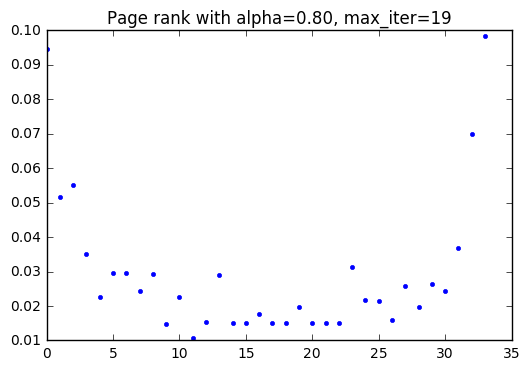

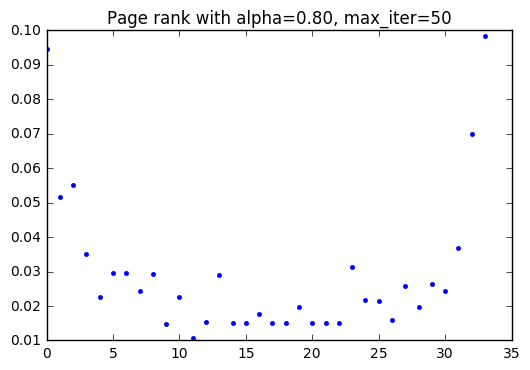

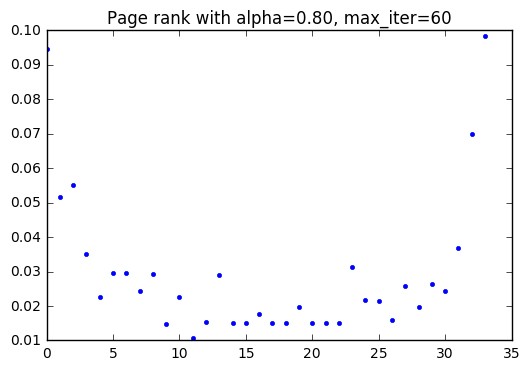

In [79]:
alpha = 0.8
for it in [19, 50, 60]:
    plotResults(G, alpha, it)

As we can see, after PageRank diverges (at max_iter=19) there's no change in ranking if max_iter is increased

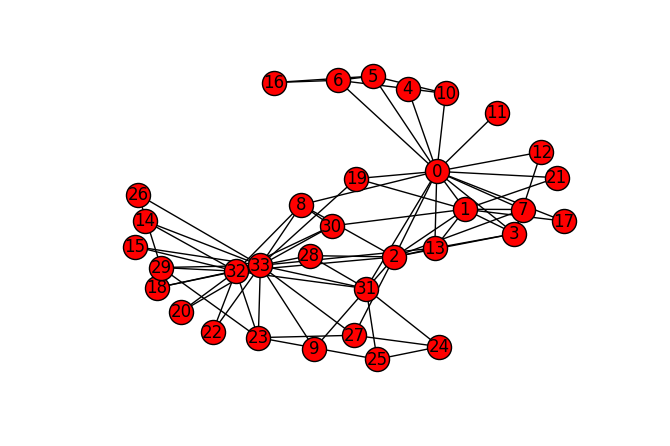

In [81]:
nx.draw(G, with_labels=True)

We can note that nodes with high degrees have higher PageRank

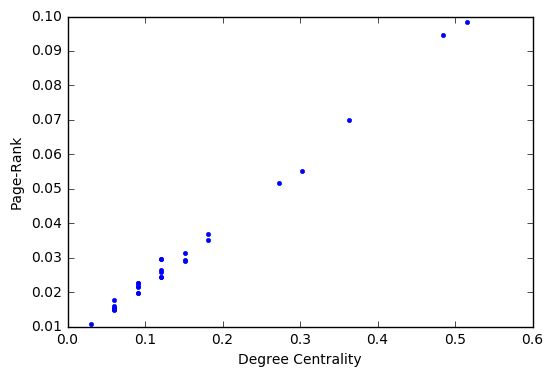

In [82]:
pr = nx.pagerank(G, alpha=0.8)
pr = pr.values()
d = nx.degree_centrality(G)
d = d.values()

plt.plot(d, pr, '.')
plt.xlabel('Degree Centrality')
plt.ylabel('Page-Rank')
plt.show()

There's a clear linear dependency between degree centrality and page-rank

# Task 2

In [3]:
G2 = nx.read_gml('C:/HSE/networks/polblogs.gml')

In [4]:
A = nx.adjacency_matrix(G2)
P = nx.DiGraph(A)

In [5]:
(h, a) = nx.hits(P)
a = a.values()
h = h.values()

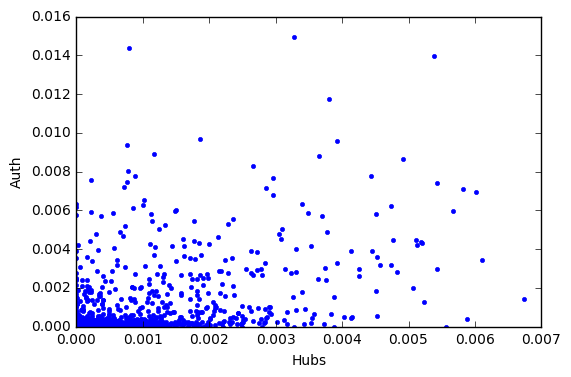

In [6]:
plt.plot(h,a, '.')
plt.xlabel('Hubs')
plt.ylabel('Auth')
plt.show()

As we can see, most of the blogs are in down left corner which means that they have low hub and authority values, this is one of the presentations of Power Law

In [108]:
idx = np.argsort(a)
print("Top 10 authority blogs:")
for i in range(1, 11):
    node = G2.node[idx[-i]]
    print i,'\t', node["label"],'\t\t value:', node["value"]

Top 10 authority blogs:
1 	dailyhowler.com 		 value: 0
2 	takebackthemedia.com 		 value: 0
3 	atomicairship.com 		 value: 0
4 	warriorsblog.blogspot.com 		 value: 0
5 	talkingpointsmemo.com 		 value: 0
6 	inmyrightmind.com 		 value: 1
7 	jpandre.blogspot.com 		 value: 0
8 	yarsrevenge.blogspot.com 		 value: 0
9 	pacificviews.org 		 value: 0
10 	dewar.journalspace.com 		 value: 0


It's hard to tell now how popular most of these blogs are now (some of them don't exist anymore or don't publish more). But it's interesting to note that most of them are left-leaning.

In [109]:
idx2 = np.argsort(h)
print("Top 10 hub blogs:")
for i in range(1, 11):
    node = G2.node[idx2[-i]]
    print i,'\t', node["label"],'\t\t value:', node["value"]

Top 10 hub blogs:
1 	politicalmonitor.us/blog 		 value: 0
2 	madamepresident2020.blogspot.com 		 value: 0
3 	liberaleric.blogspot.com 		 value: 0
4 	spectatorsport.blogspot.com 		 value: 0
5 	bluestateredstate.blogspot.com 		 value: 0
6 	contrapositive.blogspot.com 		 value: 0
7 	atrios.blogspot.com 		 value: 0
8 	tallone.org 		 value: 0
9 	newdonkey.com 		 value: 0
10 	atomicairship.com 		 value: 0


All of blogs with top hub value are left-leaning as well.

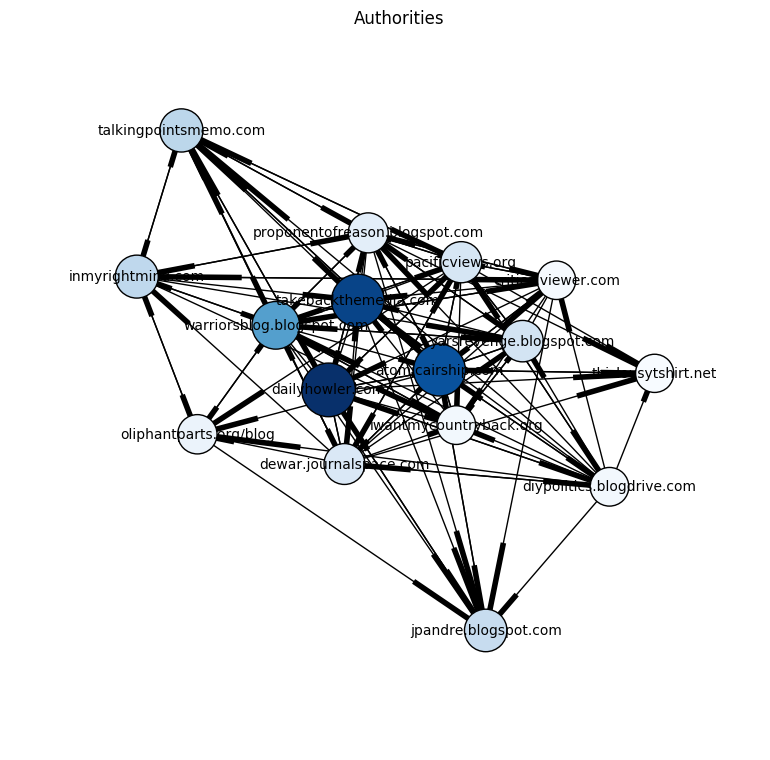

In [90]:
top_auth = []

for i, d in enumerate(a):
    if d >= 0.0075:
        top_auth.append(i)

sub_G = P.subgraph(top_auth)
sub_G_c = G2.subgraph(top_auth) # for labels

top_auth_a = []
for node in sub_G.nodes():
    top_auth_a.append(a[node])
    
pos = nx.spring_layout(sub_G)
fig = plt.figure(1, figsize=(7,7))
nx.draw(sub_G, pos, node_size=[d * 100000 for d in top_auth_a], node_color=top_auth_a, cmap=plt.cm.Blues)
nx.draw_networkx_labels(sub_G, pos, nx.get_node_attributes(sub_G_c, 'label'), font_size=10)
plt.title("Authorities")
plt.show()

Top authority subgraph was drawn. We can note that most of blogs are tightly connected to each other

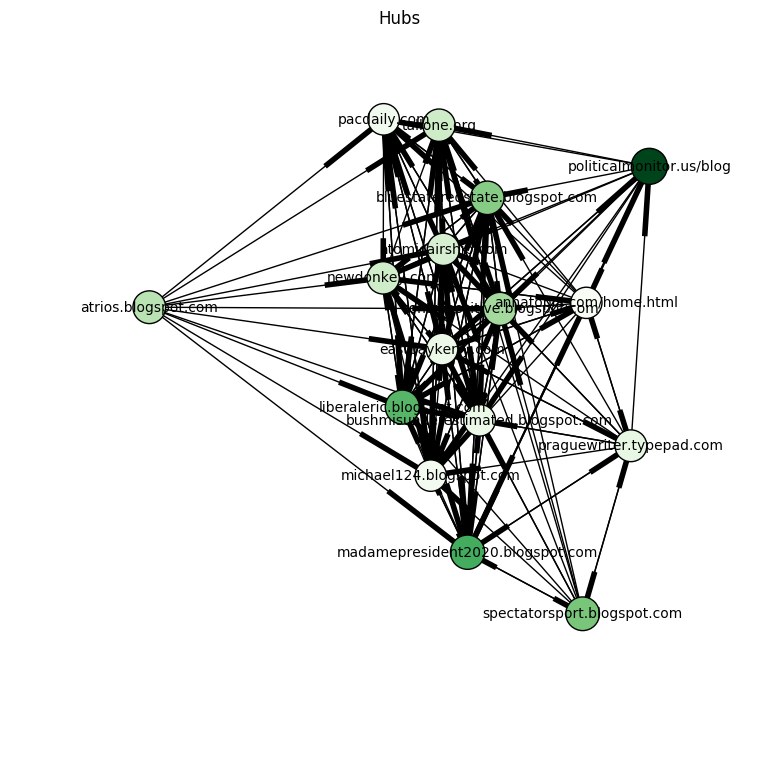

In [75]:
hubs = []

for i, v in enumerate(h):
    if v >= 0.005:
        hubs.append(i)

sub_G2 = P.subgraph(hubs)
sub_G2_c = G2.subgraph(hubs)

hubs_h = []
for node in sub_G2.nodes():
    hubs_h.append(h[node])

pos2 = nx.spring_layout(sub_G2)
fig = plt.figure(1, figsize=(7,7))
nx.draw(sub_G2, pos2, node_size=[d * 100000 for d in hubs_h], node_color=hubs_h, cmap=plt.cm.Greens)
nx.draw_networkx_labels(sub_G2, pos2, nx.get_node_attributes(sub_G2_c, 'label'), font_size=10)
plt.title("Hubs")
plt.show()

Then top nodes with high hub value were drawn. Again, nodes are highly connected. 

This confrorms to "rich hang out with the rich" principle and power law pretty well.